### Author: Anran Zheng 

In [2]:
import http.client
import pandas as pd
import os, glob
from datetime import datetime
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from shapely.geometry import Point

In [3]:
#test with march data at first
path = "C:/Users/anranzheng/Dropbox (UFL)/ML proj/Bus Delay Prediction/Miami/code/headway cal result"

#merge all the data: 5 min
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged=df_merged.drop_duplicates()

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\393436833.py:7: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\393436833.py:7: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\393436833.py:7: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\393436833.py:7: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
C:\Users\anranzheng\AppData\Local\Te

## Bus service time

Categorize by weekday and weekend

Service hour: 0-24 hr, same day

* By vehicle ID

In [5]:
df_merged.actual_time=pd.to_datetime(df_merged.actual_time)

df5=df_merged

#groupby date, route, trip_id, calculate the time difference in each trip id
#add all the time difference so we can get the operating time length by day
#average service time in barplot

#convert all route id into string
df5['route_short_name']= df5['route_short_name'].map(str)
#categorzie into weekday/weekend
weekend=df5[df5['wk']=='Weekend']
weekday=df5[df5['wk']=='Weekday']

In [6]:
df5.shape

(47786436, 35)

compute the daily number of vehicle trips

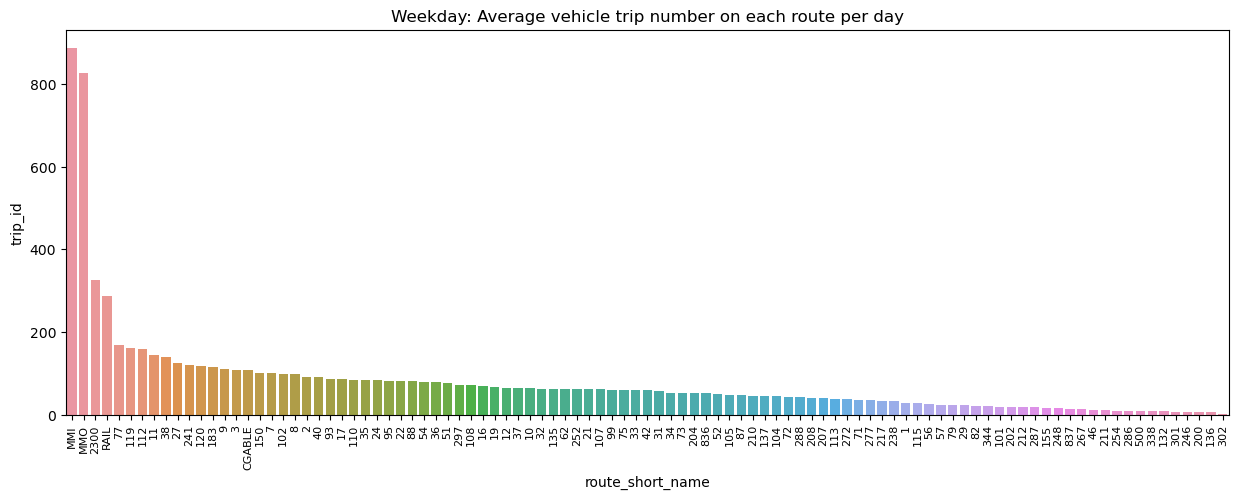

In [7]:
trip_num=weekday.groupby(['actual_date','route_short_name'])['trip_id'].nunique().reset_index()
trip_num2=trip_num.groupby(['route_short_name'])['trip_id'].mean().reset_index()

plt.figure(figsize=(15,5))
seaborn.barplot(y="trip_id", x="route_short_name", data=trip_num2, order=trip_num2.sort_values(by=['trip_id'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekday: Average vehicle trip number on each route per day')
plt.savefig('Figure 2. The daily number of vehicle trips for each route (Weekday).png')

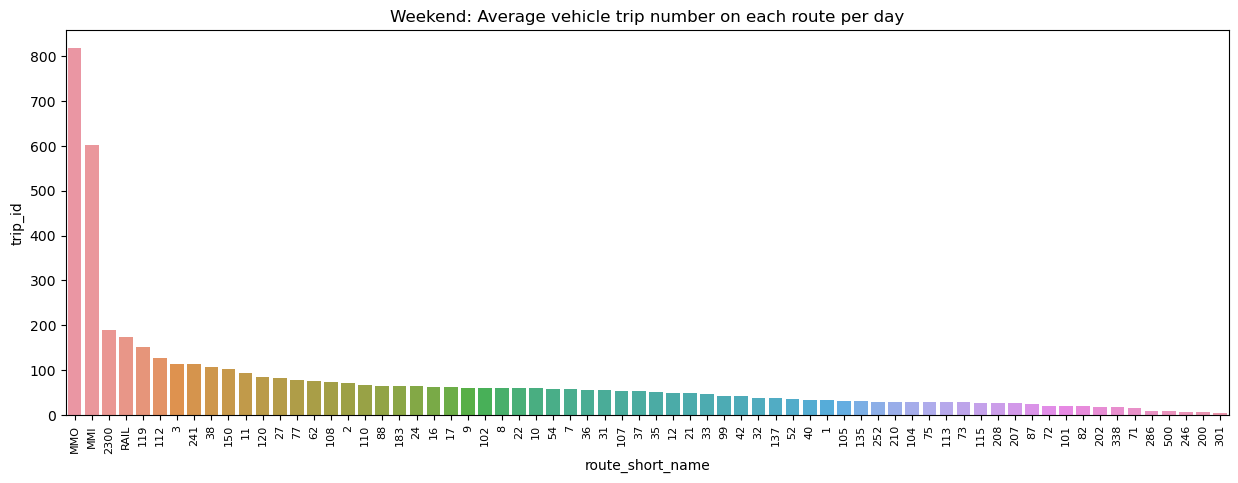

In [8]:
trip_num=weekend.groupby(['actual_date','route_short_name'])['trip_id'].nunique().reset_index()
trip_num2=trip_num.groupby(['route_short_name'])['trip_id'].mean().reset_index()

plt.figure(figsize=(15,5))
seaborn.barplot(y="trip_id", x="route_short_name", data=trip_num2, order=trip_num2.sort_values(by=['trip_id'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekend: Average vehicle trip number on each route per day')
plt.savefig('Figure 2. The daily number of vehicle trips for each route (Weekend).png')

In [9]:
weekday_group=weekday.groupby(['actual_date','route_short_name','vehicle_id','trip_id'])['actual_time'].agg(['min','max']).reset_index()

weekday_group['max2']=pd.to_datetime(weekday_group['max']).dt.second+60*pd.to_datetime(weekday_group['max']).dt.minute+3600*pd.to_datetime(weekday_group['max']).dt.hour

weekday_group['min2']=pd.to_datetime(weekday_group['min']).dt.second+60*pd.to_datetime(weekday_group['min']).dt.minute+3600*pd.to_datetime(weekday_group['min']).dt.hour

weekday_group['duration']=(weekday_group['max2']-weekday_group['min2'])/60

service_time=weekday_group.groupby(['actual_date','route_short_name','vehicle_id'])['duration'].sum().reset_index()
service_time['duration(hr)']=service_time['duration']/60

# 6 min-24 hr
#should compare with schedule
filter=service_time[(service_time['duration(hr)']<24)&(service_time['duration(hr)']>0.1)]

<AxesSubplot: ylabel='Frequency'>

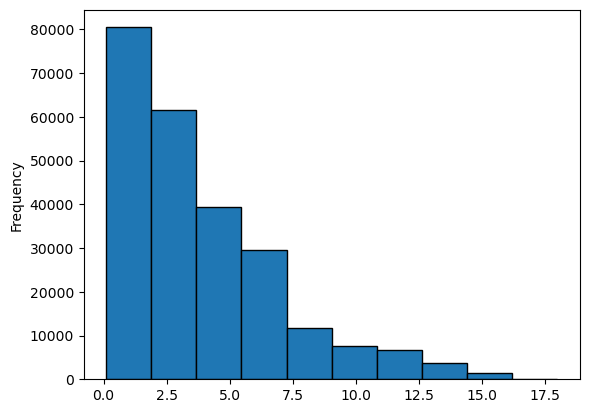

In [10]:
service_time[(service_time['duration(hr)']<24)&(service_time['duration(hr)']>0.1)]['duration(hr)'].plot(kind='hist', edgecolor='black')

<AxesSubplot: ylabel='Frequency'>

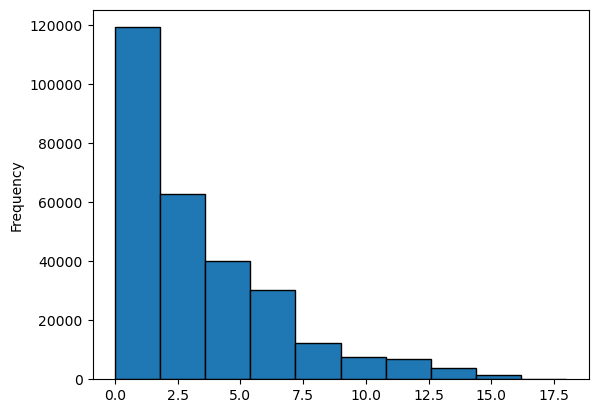

In [11]:
service_time[(service_time['duration(hr)']<24)&(service_time['duration(hr)']>0)]['duration(hr)'].plot(kind='hist', edgecolor='black')

In [12]:
group1=filter.groupby(['route_short_name'])['duration(hr)'].max().reset_index()

* By trip id

In [13]:
weekend=df5[df5['wk']=='Weekend']
weekday=df5[df5['wk']=='Weekday']

* Weekday

In [14]:
weekday_group=weekday.groupby(['actual_date','route_short_name','trip_id'])['actual_time'].agg(['min','max']).reset_index()

weekday_group['max2']=pd.to_datetime(weekday_group['max']).dt.second+60*pd.to_datetime(weekday_group['max']).dt.minute+3600*pd.to_datetime(weekday_group['max']).dt.hour

weekday_group['min2']=pd.to_datetime(weekday_group['min']).dt.second+60*pd.to_datetime(weekday_group['min']).dt.minute+3600*pd.to_datetime(weekday_group['min']).dt.hour

weekday_group['duration']=(weekday_group['max2']-weekday_group['min2'])/60

weekday_group['duration'][weekday_group['duration']>=1000]=1440-weekday_group['duration']

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\4145275734.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_group['duration'][weekday_group['duration']>=1000]=1440-weekday_group['duration']


In [15]:
trip_time=weekday_group.groupby(['actual_date','route_short_name'])['duration'].sum().reset_index()
trip_time['duration(hr)']=trip_time['duration']/60
trip_time

,actual_date,route_short_name,duration,duration(hr)
0,01-02-23,1,556.583333,9.276389
1,01-02-23,10,4091.500000,68.191667
2,01-02-23,101,0.000000,0.000000
3,01-02-23,102,2672.733333,44.545556
4,01-02-23,104,2572.066667,42.867778
...,...,...,...,...
12154,12-30-22,99,4224.666667,70.411111
12155,12-30-22,CGABLE,2923.416667,48.723611
12156,12-30-22,MMI,4540.116667,75.668611
12157,12-30-22,MMO,9287.550000,154.792500


In [16]:
data2=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

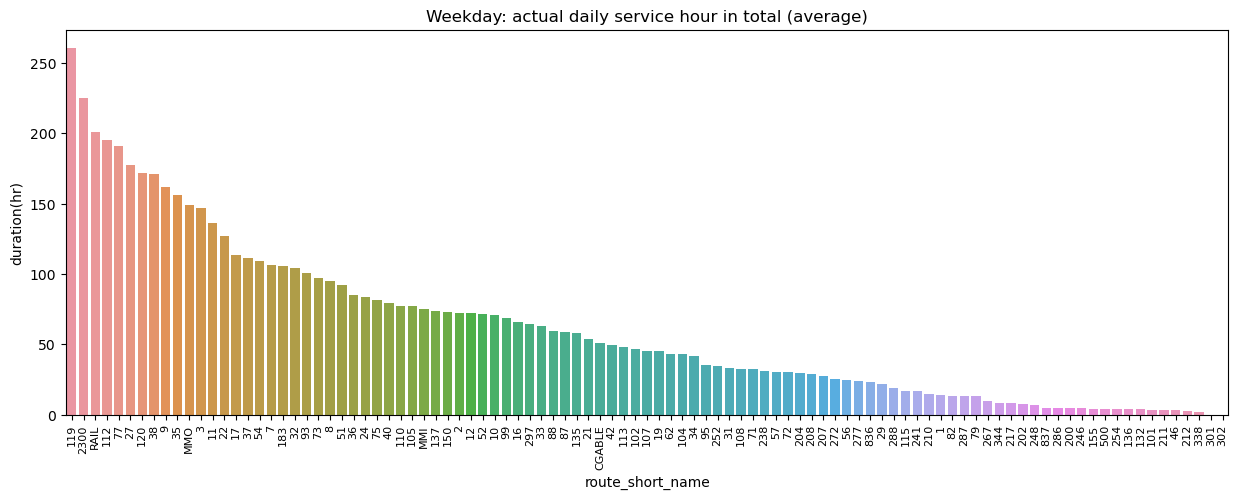

In [17]:
plt.figure(figsize=(15,5))
seaborn.barplot(y="duration(hr)", x="route_short_name", data=data2, order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekday: actual daily service hour in total (average)')
plt.savefig('Figure 3. bus service hour by weekday.png')

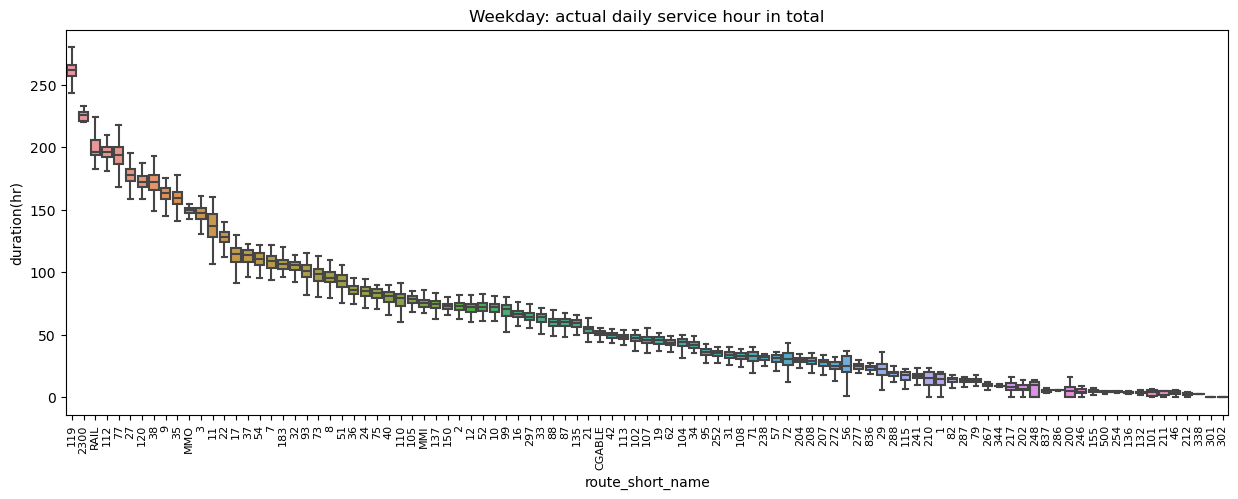

In [18]:
plt.figure(figsize=(15,5))
seaborn.boxplot(y="duration(hr)", x="route_short_name", data=trip_time,showfliers = False,order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekday: actual daily service hour in total')
plt.savefig('Figure 3. bus service hour by weekday (boxplot).png')

In [19]:
weekday_mean=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

#the shortest service hour
weekday_mean.sort_values("duration(hr)",inplace=True,ascending = False)

weekday_mean.head(10)

,route_short_name,duration(hr)
13,119,260.595688
38,2300,225.160750
98,RAIL,201.138515
10,112,195.215068
83,77,191.390058
47,27,177.300109
15,120,171.777274
67,38,171.447418
91,9,162.018327
64,35,156.532224


In [20]:
weekday_mean.tail(10)

,route_short_name,duration(hr)
45,254,4.228113
18,136,3.940478
16,132,3.905106
2,101,3.630498
34,211,3.580553
70,46,3.463479
35,212,2.711878
61,338,2.302222
56,301,0.122806
57,302,0.037631


- Weekend

In [21]:
weekend_group=weekend.groupby(['actual_date','route_short_name','trip_id'])['actual_time'].agg(['min','max']).reset_index()

weekend_group['max2']=pd.to_datetime(weekend_group['max']).dt.second+60*pd.to_datetime(weekend_group['max']).dt.minute+3600*pd.to_datetime(weekend_group['max']).dt.hour

weekend_group['min2']=pd.to_datetime(weekend_group['min']).dt.second+60*pd.to_datetime(weekend_group['min']).dt.minute+3600*pd.to_datetime(weekend_group['min']).dt.hour

weekend_group['duration']=(weekend_group['max2']-weekend_group['min2'])/60

weekend_group['duration'][weekend_group['duration']>=1000]=1440-weekend_group['duration']


C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\3447304968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_group['duration'][weekend_group['duration']>=1000]=1440-weekend_group['duration']


In [22]:
trip_time=weekend_group.groupby(['actual_date','route_short_name'])['duration'].sum().reset_index()
trip_time['duration(hr)']=trip_time['duration']/60
trip_time

,actual_date,route_short_name,duration,duration(hr)
0,01-01-23,1,937.533333,15.625556
1,01-01-23,10,2852.650000,47.544167
2,01-01-23,101,377.066667,6.284444
3,01-01-23,102,1467.850000,24.464167
4,01-01-23,104,1350.016667,22.500278
...,...,...,...,...
3365,12-31-22,9,5104.283333,85.071389
3366,12-31-22,99,3017.500000,50.291667
3367,12-31-22,MMI,3116.766667,51.946111
3368,12-31-22,MMO,12792.333333,213.205556


In [23]:
data2=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

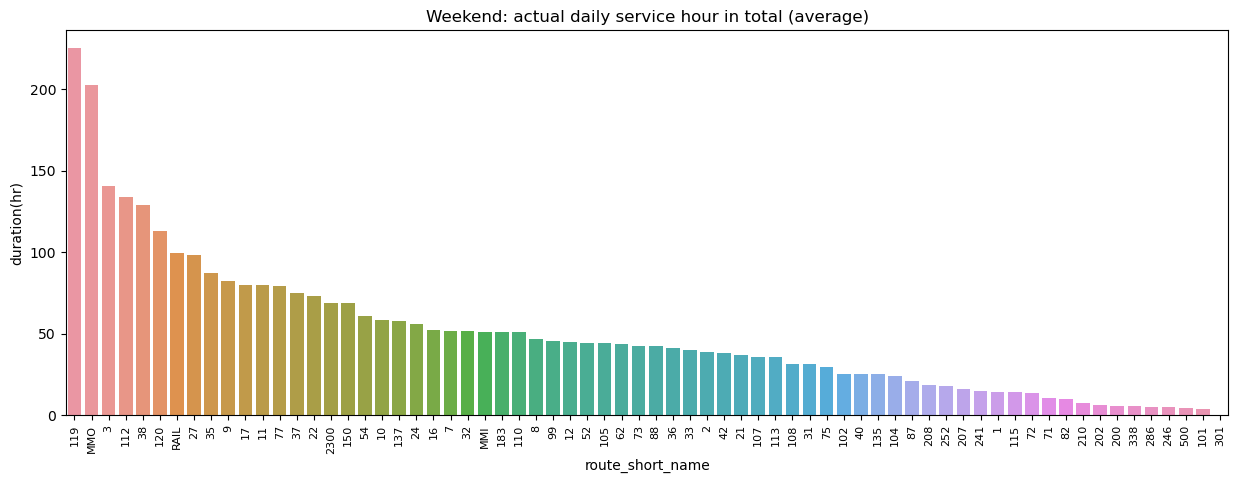

In [24]:
plt.figure(figsize=(15,5))
seaborn.barplot(y="duration(hr)", x="route_short_name", data=data2, order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekend: actual daily service hour in total (average)')
plt.savefig('Figure 3. bus service hour by weekend.png')

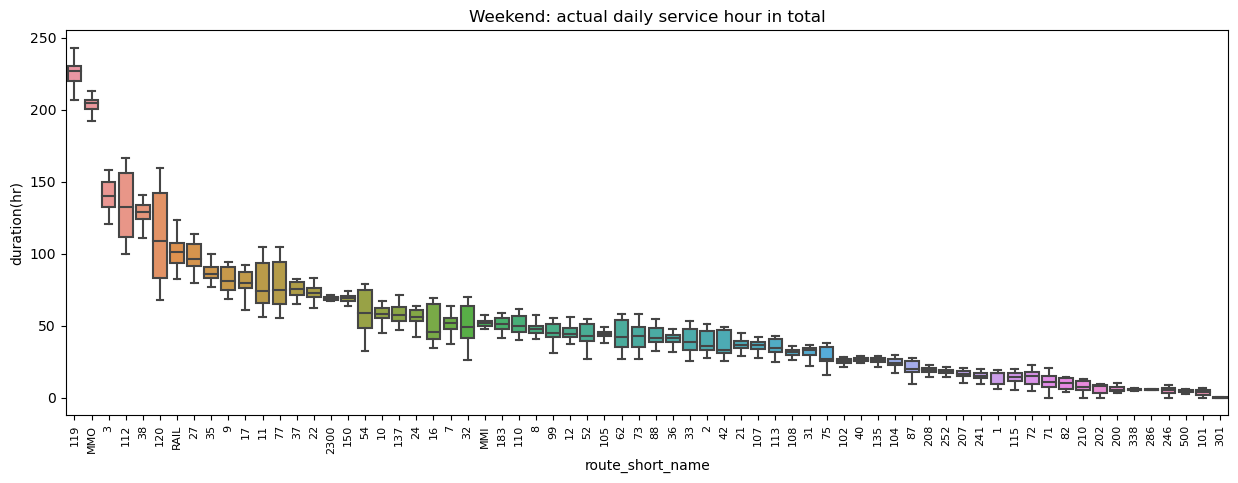

In [25]:
plt.figure(figsize=(15,5))
seaborn.boxplot(y="duration(hr)", x="route_short_name", data=trip_time,showfliers = False,order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekend: actual daily service hour in total')
plt.savefig('Figure 3. bus service hour by weekend (boxplot).png')

In [26]:
weekend_mean=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

#the shortest service hour
weekend_mean.sort_values("duration(hr)",inplace=True,ascending = False)

weekend_mean.head(10)

,route_short_name,duration(hr)
13,119,224.960449
66,MMO,202.323090
37,3,140.398387
10,112,134.055112
46,38,128.800572
15,120,112.869049
67,RAIL,99.445516
35,27,98.000582
43,35,87.124172
63,9,82.049594


In [27]:
weekend_mean.tail(10)

,route_short_name,duration(hr)
60,82,9.658782
28,210,7.599129
24,202,6.193729
23,200,5.413170
42,338,5.311554
36,286,4.748727
33,246,4.681677
49,500,4.571202
2,101,3.493574
38,301,0.088034


## schedule service time

In [28]:
stop=pd.read_csv('..//miami gtfs static//gtfs previous//stop_times.txt')

trip = pd.read_csv('..//miami gtfs static//gtfs previous//trips.txt')

#merge with trips
df2=stop.merge(trip,on='trip_id', how='left')

#merge with date: should be calendar instead!
date = pd.read_csv("..//miami gtfs static//gtfs previous//calendar_dates.txt")
df3=df2.merge(date,on='service_id', how='left')

stop2=pd.read_csv('..//miami gtfs static//gtfs previous//stops.txt')
df4=df3.merge(stop2,on='stop_id', how='left')

calendar=pd.read_csv('..//miami gtfs static//gtfs previous//calendar.txt')
df6=df4.merge(calendar,on='service_id', how='left')

route=pd.read_csv('..//miami gtfs static//gtfs previous//routes.txt')
df6=df6.merge(route,on='route_id', how='left')

#按逗号分隔开，转成overall时间再转成
df6[['hr','min','sec']]=df6['arrival_time'].str.split(':',expand=True)

df6.hr[df6.hr == ' 3'] = '03'
df6.hr[df6.hr == ' 4'] = '04'
df6.hr[df6.hr == ' 5'] = '05'
df6.hr[df6.hr == ' 6']   = '06'
df6.hr[df6.hr == ' 7'] = '07'
df6.hr[df6.hr == ' 8']   = '08'
df6.hr[df6.hr == ' 9']   = '09'

df6.hr[df6.hr == '24']   = '00'
df6.hr[df6.hr == '25'] = '01'
df6.hr[df6.hr == '26']   = '02'
df6.hr[df6.hr == '27']   = '03'
df6.hr[df6.hr == '28']   = '04'
df6.hr[df6.hr == '29']   = '05'
df6.hr[df6.hr == '30']   = '06'

df6 ['new_time2'] = df6[['hr','min','sec']].apply(
    lambda x: ':'.join(x.dropna().astype(str)),
    axis=1
)

df6['new_time2']=pd.to_datetime(df6['new_time2'])

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\2852131101.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.hr[df6.hr == ' 3'] = '03'
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\2852131101.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.hr[df6.hr == ' 4'] = '04'
C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\2852131101.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.hr[df6.hr == ' 5']

In [29]:
#categorzie into weekday/weekend
weekend=df6[(df6['saturday']==1)|(df6['sunday']==1)]
weekday=df6[(df6['monday']==1)|(df6['tuesday']==1)|(df6['wednesday']==1)|(df6['thursday']==1)|(df6['friday']==1)]

* calculate by trip ID duration and add together

* Weekday

In [30]:
weekday_group=weekday.groupby(['service_id','route_short_name','trip_id'])['new_time2'].agg(['min','max']).reset_index()

weekday_group['max2']=pd.to_datetime(weekday_group['max']).dt.second+60*pd.to_datetime(weekday_group['max']).dt.minute+3600*pd.to_datetime(weekday_group['max']).dt.hour

weekday_group['min2']=pd.to_datetime(weekday_group['min']).dt.second+60*pd.to_datetime(weekday_group['min']).dt.minute+3600*pd.to_datetime(weekday_group['min']).dt.hour

weekday_group['duration']=(weekday_group['max2']-weekday_group['min2'])/60

weekday_group['duration'][weekday_group['duration']>=1000]=1440-weekday_group['duration']

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\2245819667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_group['duration'][weekday_group['duration']>=1000]=1440-weekday_group['duration']


In [31]:
trip_time=weekday_group.groupby(['service_id','route_short_name'])['duration'].sum().reset_index()
trip_time['duration(hr)']=trip_time['duration']/60
trip_time

,service_id,route_short_name,duration,duration(hr)
0,1,1,1282.00,21.366667
1,1,10,4435.35,73.922500
2,1,101,378.00,6.300000
3,1,102,2842.60,47.376667
4,1,104,2794.00,46.566667
...,...,...,...,...
124,11,MMO,7973.00,132.883333
125,101,BALHVL,405.00,6.750000
126,201,BALHVL,226.00,3.766667
127,501,254,264.00,4.400000


In [32]:
data2=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

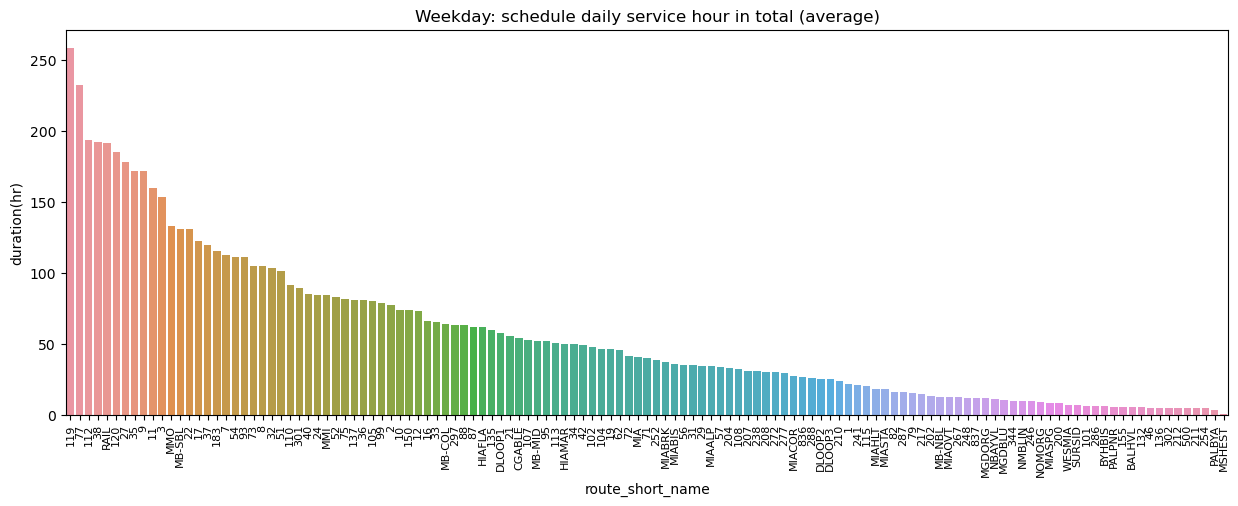

In [33]:
plt.figure(figsize=(15,5))
seaborn.barplot(y="duration(hr)", x="route_short_name", data=data2, order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekday: schedule daily service hour in total (average)')
plt.savefig('Figure 4. scheduled daily hour by weekday.png')

In [34]:
weekday_mean=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

#the shortest service hour
weekday_mean.sort_values("duration(hr)",inplace=True,ascending = False)

weekday_mean.head(10)

,route_short_name,duration(hr)
13,119,258.066944
81,77,232.056944
10,112,193.459167
65,38,192.213611
124,RAIL,191.516667
15,120,184.762778
46,27,177.565556
62,35,171.687778
89,9,171.675000
8,11,159.610278


In [35]:
weekday_mean.tail(10)

,route_short_name,duration(hr)
16,132,5.233333
68,46,5.000000
18,136,4.800000
56,302,4.666667
35,212,4.616667
69,500,4.583333
34,211,4.533333
44,254,4.400000
122,PALBYA,3.366667
118,MSHEST,0.800000


* Weekend

In [36]:
weekend_group=weekend.groupby(['service_id','route_short_name','trip_id'])['new_time2'].agg(['min','max']).reset_index()

weekend_group['max2']=pd.to_datetime(weekend_group['max']).dt.second+60*pd.to_datetime(weekend_group['max']).dt.minute+3600*pd.to_datetime(weekend_group['max']).dt.hour

weekend_group['min2']=pd.to_datetime(weekend_group['min']).dt.second+60*pd.to_datetime(weekend_group['min']).dt.minute+3600*pd.to_datetime(weekend_group['min']).dt.hour

weekend_group['duration']=(weekend_group['max2']-weekend_group['min2'])/60

weekend_group['duration'][weekend_group['duration']>=1000]=1440-weekend_group['duration']

trip_time=weekend_group.groupby(['service_id','route_short_name'])['duration'].sum().reset_index()
trip_time['duration(hr)']=trip_time['duration']/60
trip_time

C:\Users\anranzheng\AppData\Local\Temp\ipykernel_27088\332631794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_group['duration'][weekend_group['duration']>=1000]=1440-weekend_group['duration']


,service_id,route_short_name,duration,duration(hr)
0,2,1,1203.000000,20.050000
1,2,10,3745.416667,62.423611
2,2,101,378.000000,6.300000
3,2,102,1441.000000,24.016667
4,2,104,1518.000000,25.300000
...,...,...,...,...
156,13,MIA,2442.000000,40.700000
157,13,MMI,3343.500000,55.725000
158,13,MMO,11167.000000,186.116667
159,101,BALHVL,405.000000,6.750000


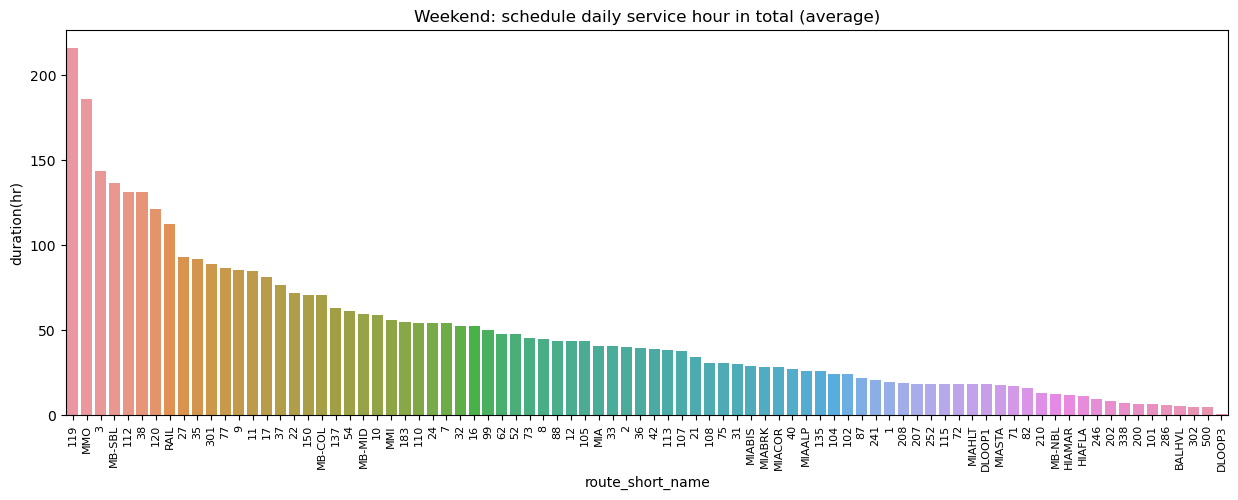

In [37]:
data2=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

plt.figure(figsize=(15,5))
seaborn.barplot(y="duration(hr)", x="route_short_name",  data=data2, order=data2.sort_values(by=['duration(hr)'], ascending=False).set_index('route_short_name').index)
plt.xticks(rotation=90,fontsize=8)
plt.title('Weekend: schedule daily service hour in total (average)')
plt.savefig('Figure 4. scheduled daily hour by weekend.png')

In [38]:
weekend_mean=trip_time.groupby(['route_short_name'])['duration(hr)'].mean().reset_index()

#the shortest service hour
weekend_mean.sort_values("duration(hr)",inplace=True,ascending = False)

weekend_mean.head(10)

,route_short_name,duration(hr)
13,119,215.713750
82,MMO,186.116667
36,3,143.380972
73,MB-SBL,136.636528
10,112,131.193472
46,38,131.090556
15,120,121.332361
83,RAIL,112.116667
34,27,92.978056
43,35,91.708333


In [39]:
weekend_mean.tail(10)

,route_short_name,duration(hr)
32,246,9.333333
24,202,8.108333
42,338,6.783333
23,200,6.625000
2,101,6.300000
35,286,5.866667
65,BALHVL,5.258333
38,302,4.666667
49,500,4.583333
67,DLOOP3,0.583333


## Stop times 

C:\Users\anranzheng\Anaconda3\envs\geo\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


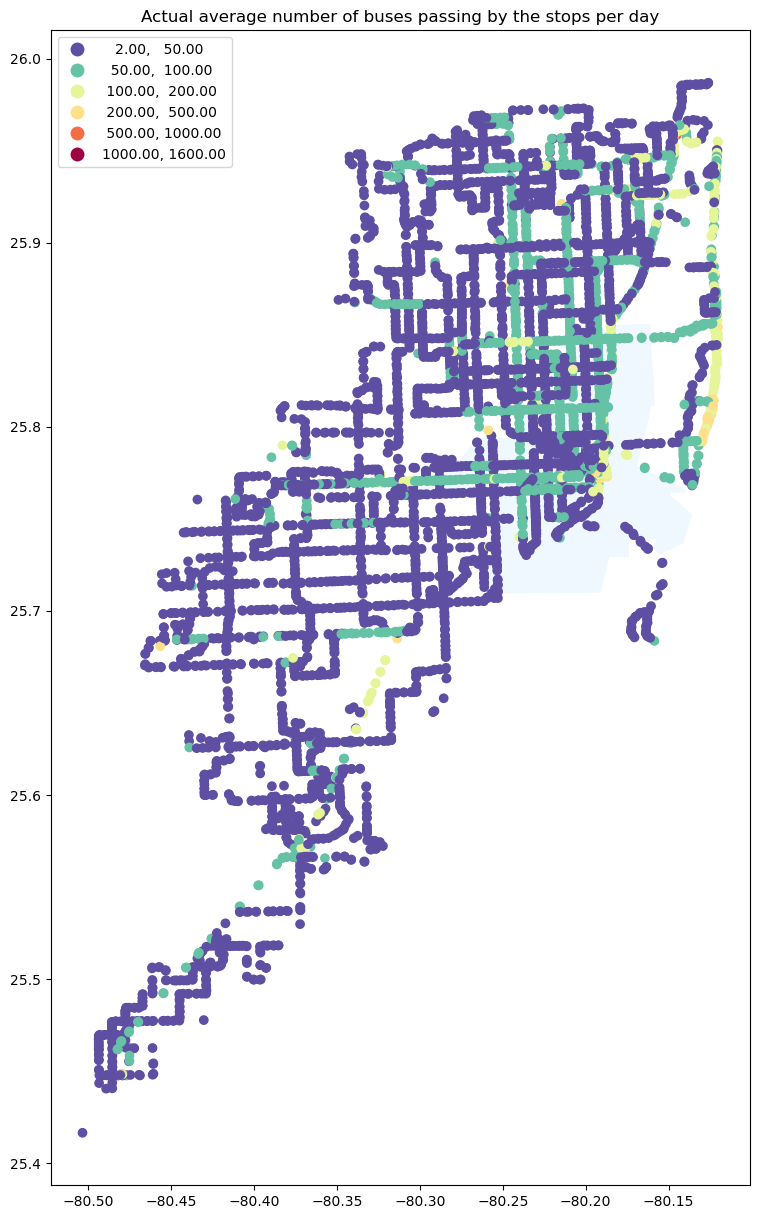

In [42]:
#只要经过，就count
import pyogrio
#next step: merge the stop lat, lon info to the stopID
stop_info=pd.read_csv('..//miami data//merge_schedule.csv')[['stop_id','stop_lat','stop_lon']]

weekday=df5

weekday3=weekday.groupby(['actual_date','stop_id'])['trip_id'].size().reset_index()

weekday_mean=weekday3.groupby(['stop_id'])['trip_id'].mean().reset_index()
weekday_stop = pd.merge(weekday_mean, stop_info, how='left', on='stop_id')

weekday_stop=weekday_stop.drop_duplicates()
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(weekday_stop['stop_lon'],weekday_stop['stop_lat'])]
geo_weekday=gpd.GeoDataFrame(weekday_stop,crs=crs,geometry=geometry)

jax_boundary= gpd.read_file('C:/Users/anranzheng/Downloads/Miami_City_District/Miami_City_District.shp')
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
jax_boundary.plot(ax=ax, color='aliceblue', label='boundary')

geo_weekday.plot(ax=ax, marker='o', column='trip_id', scheme="User_Defined", classification_kwds=dict(bins=[50,100,200,500,1000,1600]),legend=True, cmap='Spectral_r')
#plt.title('Early arrival rate at Transit stops at Weekend (%)')
plt.title('Actual average number of buses passing by the stops per day')

plt.savefig('Figure 5. Actual daily number of transit vehicles serving each stop.png')